<a href="https://colab.research.google.com/github/joaodpcm/MDA/blob/preprocessing_data_david/preprocessing_data_mda_david.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration**

---

The notebook contains the preprocessing from the used data. It explains in detail 





# Importing Packages


In [1]:
# Importing packages 
!pip install pandas-profiling
!pip install ydata-profiling
!pip install geopy
!pip install featuretools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft
import os
import missingno as msno


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 29.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2756e40102b558bbf90864e4a735c33808321ec9ad15a

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 24.8 MB/s eta 0:00:00


# Clone repository

In [3]:
#Accessing GitHub repository
!git clone <https://github.com/joaodpcm/MDAgit>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git clone <https://github.com/joaodpcm/MDAgit>'


# Loading data

In [4]:
# Setting google drive access
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Setting package for drive
!pip install pyDrive
from google.colab import files
# Set path to the directory containing the meta dataset
path_copy_meta = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data/01_Metadata_v2.csv"
df_meta = pd.read_csv(path_copy_meta)
# Access to the year's quarter dataset 
path_copy_1 = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data/LC_2022Q3.csv"
path_copy_2 = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data/LC_2022Q3.csv"
path_copy_3 = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data/LC_2022Q3.csv"
path_copy_4 = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data/LC_2022Q3.csv"
# Loading each year's quarter dataset
df_lc1 = pd.read_csv(path_copy_1)
df_lc2 = pd.read_csv(path_copy_2)
df_lc3 = pd.read_csv(path_copy_3)
df_lc4 = pd.read_csv(path_copy_4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Merging locations datasets

The original datasets of the locations are concatenated for reaching more information about the complete year. Information about the quarter of the year is kept. 

In [ ]:
# Add a column to identify the quarter
df_lc1['quarter'] = 'Q1'
df_lc2['quarter'] = 'Q2'
df_lc3['quarter'] = 'Q3'
df_lc4['quarter'] = 'Q4'

# Concatenate the four datasets into a single dataframe
df_lc = pd.concat([df_lc1, df_lc2, df_lc3, df_lc4])

# # Print the final dataframe
# print(df_lc)

In [ ]:
df_lc['id_new'] = np.arange(len(df_lc)) + 1

In [ ]:
df_lc = df_lc.set_index('id_new')

In [ ]:
df_lc.info()

NameError: ignored

## Entity sets 

> In this part, a entity set from the datasets is created


In [ ]:
df_lc = df_lc.rename(columns={'id_new': 'lc_id'})
df_meta = df_meta.rename(columns={'ID': 'meta_id'})

In [ ]:
es = ft.EntitySet(id='meteo')

In [ ]:
es = es.add_dataframe(
    dataframe_name="locations",
    dataframe=df_lc,
    index="lc_id", 
)
es = es.add_dataframe(
    dataframe_name="meta",
    dataframe=df_meta,
    index="meta_id",
)

In [ ]:
es = es.add_relationship("meta", "meta_id", "locations", "ID")

In [ ]:
dataframes = {
    "locations": (df_lc, "lc_id"),
    "meta": (df_meta, "meta_id"),
}

In [ ]:
relationships = [
    ("meta","meta_id", "locations", "ID"),
]

In [ ]:
feature_matrix_locations, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="locations",
)
feature_matrix_locations

In [ ]:
def sample_entityset(entityset, sample_size):
    """
    Get a sample of data from each dataframe in an entityset.

    Parameters:
    -----------
    entityset : featuretools.EntitySet
        The entityset to get a sample from.
    sample_size : int
        The number of rows to sample from each dataframe.

    Returns:
    --------
    dict of pandas.DataFrame
        A dictionary of dataframes, with the key being the dataframe name and the value being the sampled dataframe.
    """
    sampled_dfs = {}
    for entity in entityset.entities:
        entity_df = entityset[entity.id]
        sampled_df = sample(entity_df, sample_size)
        sampled_dfs[entity.id] = sampled_df
    return sampled_dfs

In [ ]:
def sample_entityset(entityset, sample_size=5000)

## Merging metadata with locations dataset

The information about the included features within the metadata is relevant for the main goal we established. For that reason the final locations dataset and the metadata will be concadenated.

In [ ]:
# merge the two datasets by ID
df_meteo = pd.merge(df_meta, df_lc, on='ID')

# display the merged dataset
print(df_meteo.head())

       ID     LAT    LON  ALT  LCZ  LC  building_height       SVF  \
0  LC-002  50.847  4.756   47    9   1             4.28  0.610367   
1  LC-002  50.847  4.756   47    9   1             4.28  0.610367   
2  LC-002  50.847  4.756   47    9   1             4.28  0.610367   
3  LC-002  50.847  4.756   47    9   1             4.28  0.610367   
4  LC-002  50.847  4.756   47    9   1             4.28  0.610367   

   installation_height              DATEUTC  ...  Month  Day  Hour  Minute  \
0                    2  2022-07-01 00:10:00  ...      7    1     0      10   
1                    2  2022-07-01 00:20:00  ...      7    1     0      20   
2                    2  2022-07-01 00:30:00  ...      7    1     0      30   
3                    2  2022-07-01 00:40:00  ...      7    1     0      40   
4                    2  2022-07-01 00:50:00  ...      7    1     0      50   

   LC_RAD60  LC_TEMP_QCL0  LC_TEMP_QCL1  LC_TEMP_QCL2 LC_TEMP_QCL3  quarter  
0       0.0         11.50         11.5

In [ ]:
df_meteo.columns

Index(['ID', 'LAT', 'LON', 'ALT', 'LCZ', 'LC', 'building_height', 'SVF',
       'installation_height', 'DATEUTC', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n',
       'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN', 'LC_WINDDIR', 'LC_WINDSPEED',
       'Date', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'LC_RAD60',
       'LC_TEMP_QCL0', 'LC_TEMP_QCL1', 'LC_TEMP_QCL2', 'LC_TEMP_QCL3',
       'quarter'],
      dtype='object')

#### Exporting meteo data

In [ ]:
# # Exporting pre-cleaned meteo dataset

# df_meteo.to_csv("merged_data.csv", index=False)

In [ ]:
df = df_meteo

In [ ]:
# Sample data if needed (replace 0.5 with desired sample size)
df_sampled = df.sample(frac=0.5, random_state=1)

df = df_sampled

## Exploratory Data Analysis (EDA)

### Standard EDA

#### Descriptive Statistics 

In [ ]:
# Getting general information about the dataset 
df.info()
# Reporting descriptive statistics for numerical features within dataset
df.describe()

In [ ]:
# Creating histograms and scatterplots for each feature

#### Exploring missingness

In [ ]:
# Renaming missing values 
df = df.replace('', np.NaN)

In [ ]:
# Getting the total missing values
print("{} missing values within the dataset.".format(df.isna().sum().sum())) 

1342363 missing values within the dataset.


In [ ]:
# Defining function for recognizing missing values within features
def features_missing_values(df):
    missing = df.isnull().sum() # Identifying missing sum within each feature
    missing_pct = (missing / len(df)) * 100 # Percentage of missingness compare to total n in dataset
    missing_values = pd.concat([
        missing, missing_pct.astype('int64')], # Getting type int64 for Percentage column 
        axis=1, 
        keys=[
            'Total Missing', 'Percentage (%)']
     ) # Creating dataframe with % of missing for each feature
    missing_values.sort_values(by='Total Missing', ascending=False, inplace=True) # Sorting
    missing_values.index.name = 'Feature' # Setting the index as 'Feature'
    return missing_values # It returns an additional dataframe for the missing rate

In [ ]:
# Applying function for identifying missing values 
features_missing = features_missing_values(df)

In [ ]:
print(features_missing)

                     Total Missing  Percentage (%)
Feature                                           
LC_TEMP_QCL3                110557               3
LC_TEMP_QCL2                110557               3
LC_TEMP_QCL1                110557               3
LC_DAILYRAIN                 97729               3
LC_TEMP_QCL0                 97729               3
LC_WINDSPEED                 97729               3
LC_WINDDIR                   97729               3
LC_HUMIDITY                  97729               3
LC_DWPTEMP                   97729               3
LC_n                         97729               3
LC_RAD                       97729               3
LC_RAININ                    97729               3
LC_RAD60                     78253               2
SVF                          52878               1
Day                              0               0
Hour                             0               0
Year                             0               0
Minute                         

In [ ]:
def instances_missing_rate(df):
    # Calculate missing value rate for each instance
    missing_rate_instance = df.isna().sum(axis=1) / df.shape[1]
    # Create dataframe with missing value rate for each instance
    df_missing_rate = pd.DataFrame({'Instance': df.index, 'Missing_Rate': missing_rate_instance})
    return df_missing_rate

In [ ]:
missing_rate_row = instances_missing_rate(df)

In [ ]:
print(instances_missing_rate(df))

##### Visualization of missingness patterns

<AxesSubplot: >

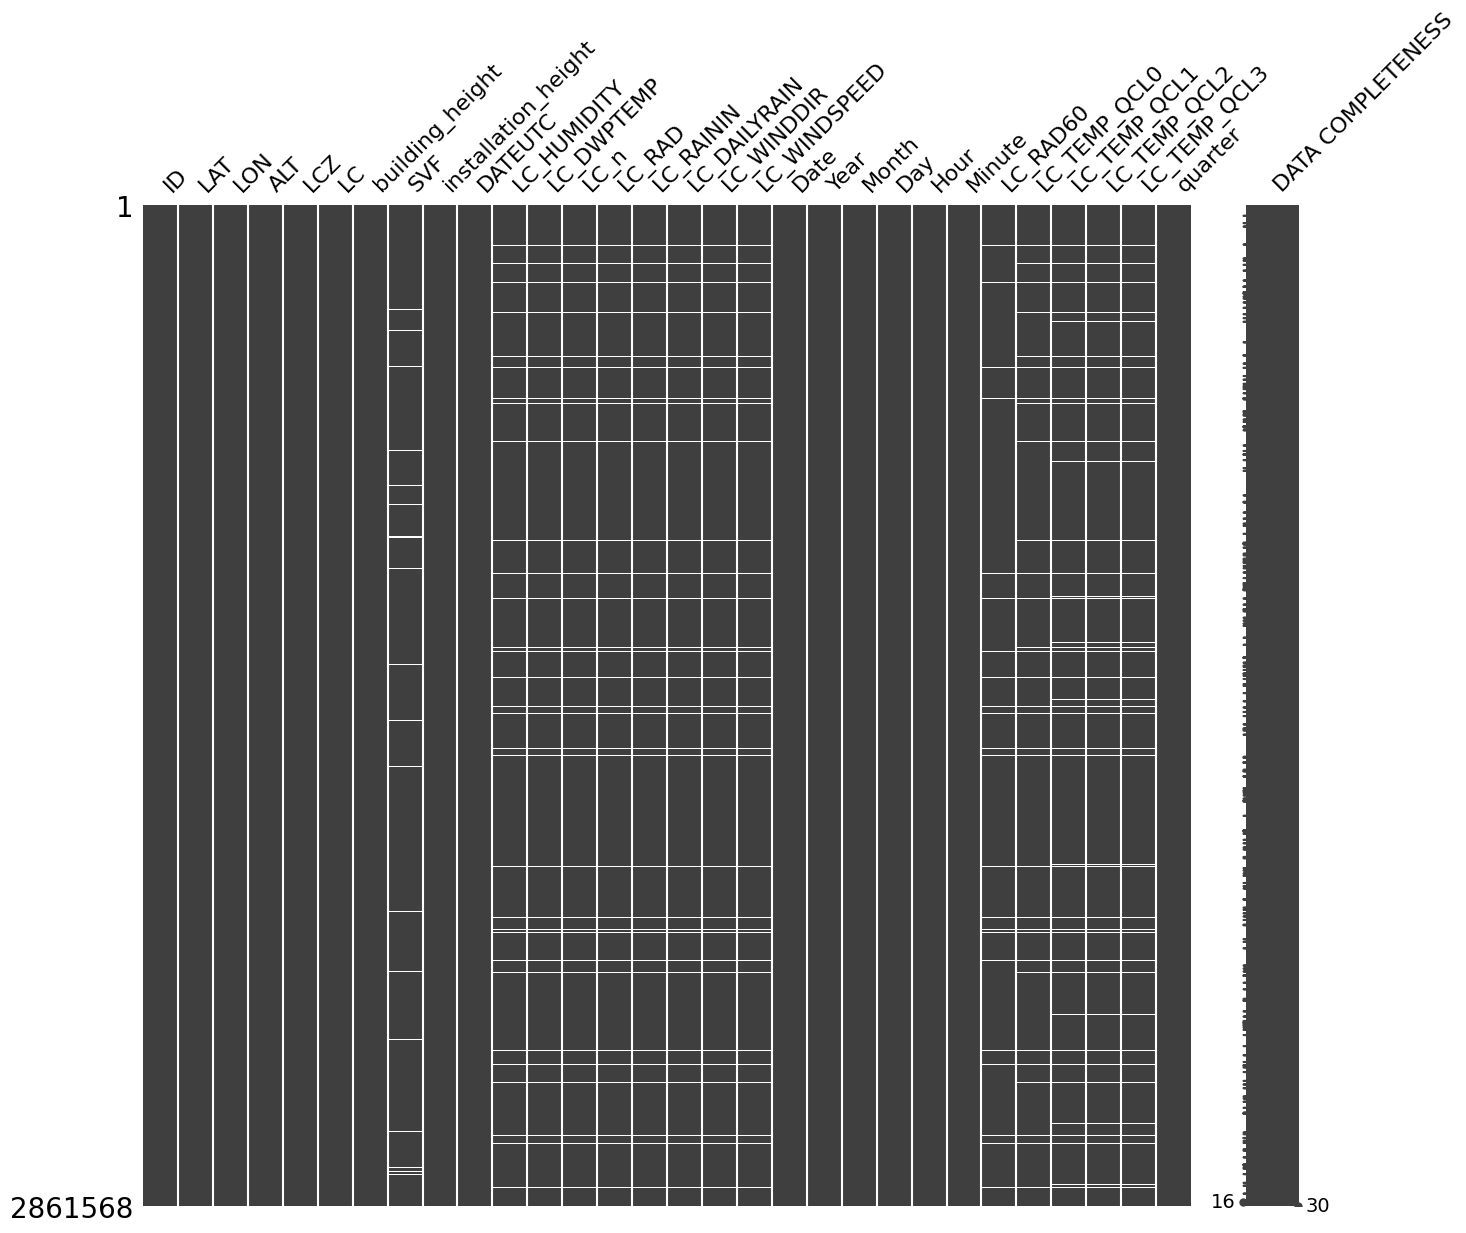

In [ ]:
import missingno as msno
# Missingness matrix
msno.matrix(df, figsize = (15, 13),  labels=True)

<AxesSubplot: >

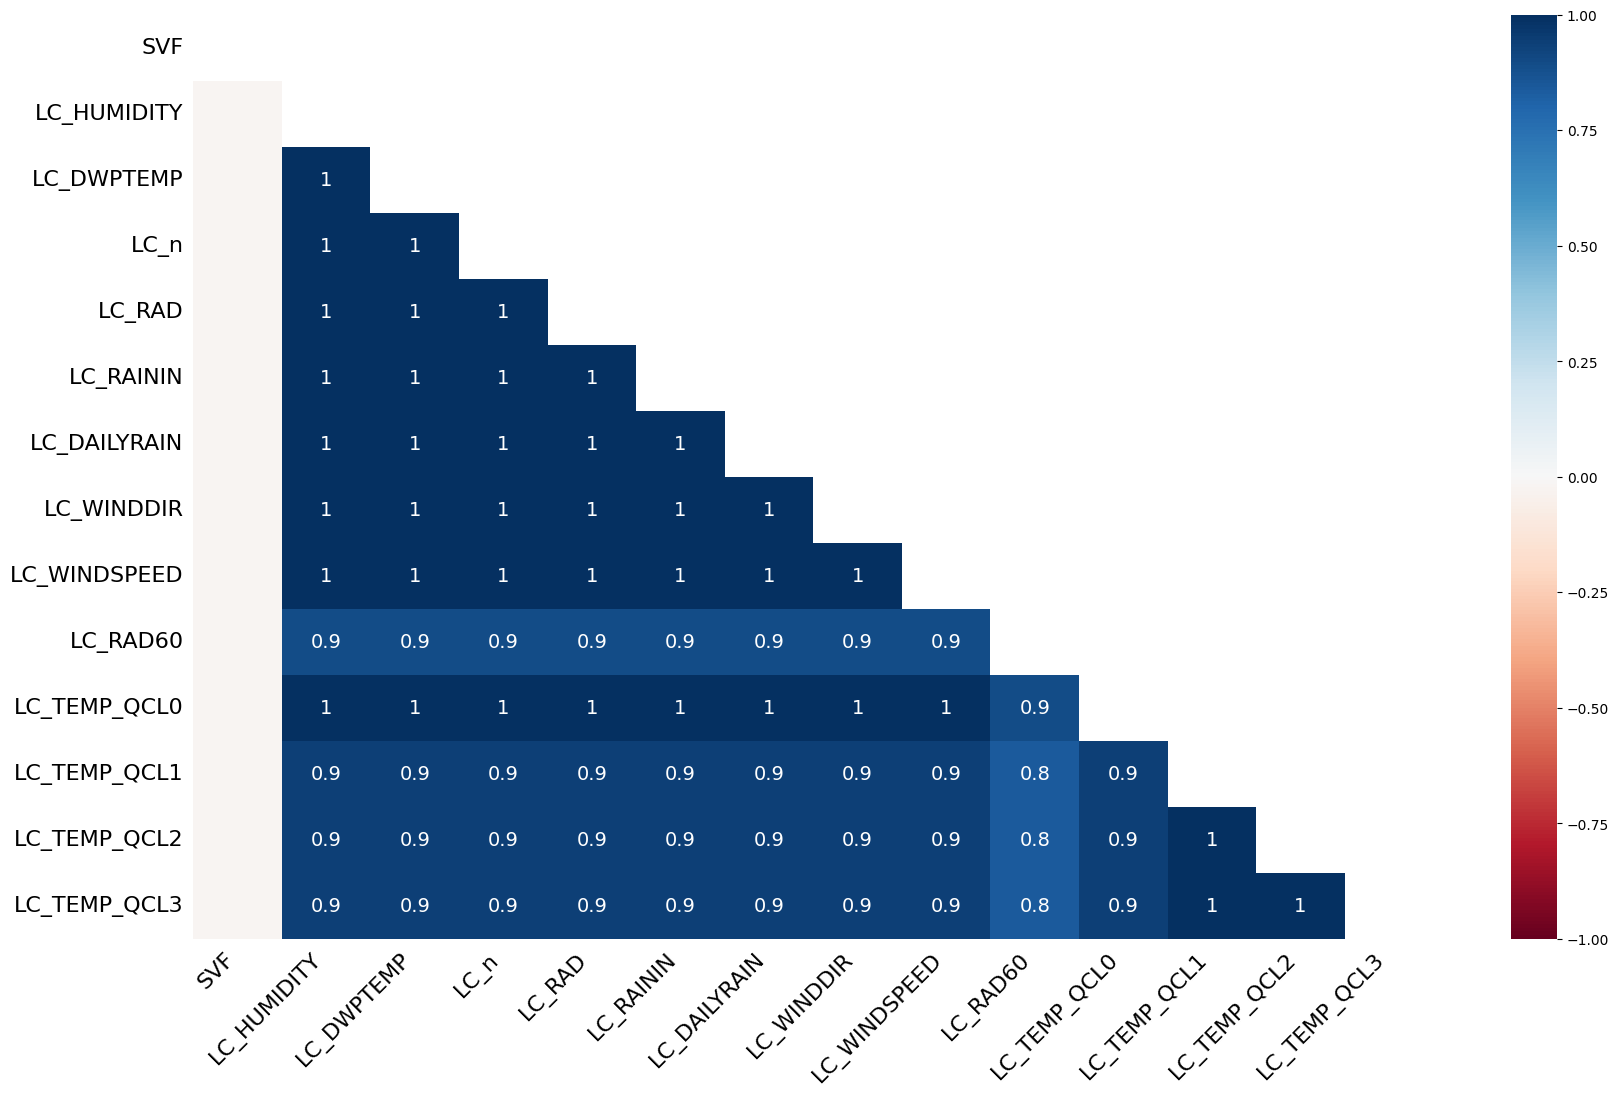

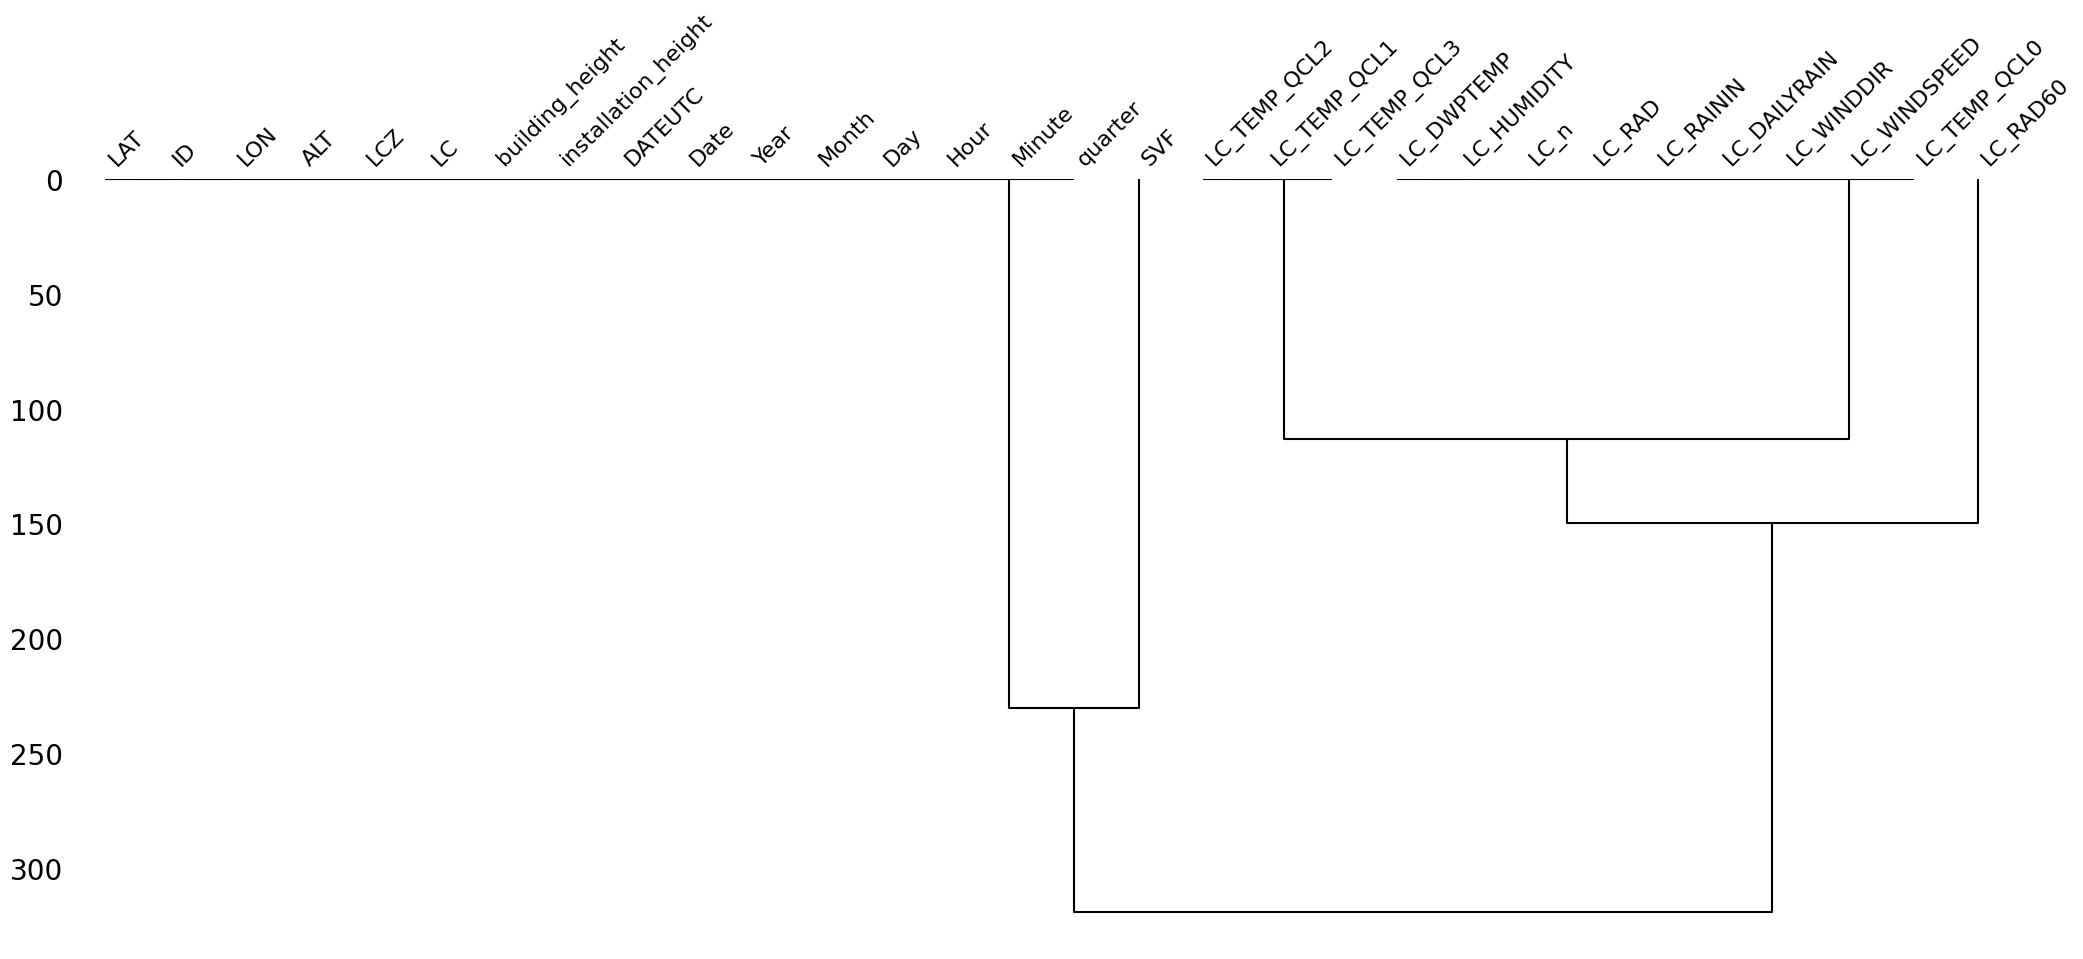

In [ ]:
# Missingness nullity correlation
msno.heatmap(df)
# Missingness in dendogram
msno.dendrogram(df)

In [ ]:
# df is a pandas.DataFrame instance
df_missing = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis=0)) if n > 0]]
corr_mat = df_missing.isnull().corr()

In [ ]:
corr_mat

For having a deeper understanding about the missingness within the dataset, please refer to the profile report on the training data.

#### Exploring features

In [ ]:
def generate_histograms(data, folder_name):

  # Create the directory if it doesn't exist
  folder_path = "/content/drive/MyDrive/modern_data_analysis/data/meteo_data" + folder_name
  !mkdir -p "$folder_path"
  
  # Generate histograms for each feature and save them to the folder
  for column in df.columns:
      fig, ax = plt.subplots(figsize=(8, 4))
      df[column].hist(ax=ax, bins=20)
      ax.set_title(column)
      fig.savefig(folder_path + '/' + column + '.png')
      plt.close(fig)

In [ ]:
generate_histograms(df, 'histograms_folder')

In [ ]:
sns.kdeplot(data=df, x="target")

#### Correlation among features

In [ ]:
# Definying a function for correlation identification with heatmap visualization
def correlation_heatmap(df):
    # Getting correlation matrix
    corr_matrix = df.corr()
    # Print correlation matrix
    print("Correlation Matrix:\n", corr_matrix.to_string())
    # Create heatmap plot
    plt.figure(figsize=(10, 8)) # Suggested for plotting the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.1f')
    # Show the plot
    plt.show()

In [ ]:
# Getting and visualizing correlations with a heatmap and the correlation matrix
correlation_heatmap(df)

#### Identifying outliers

#### Getting information about the features

#### Locations

In [ ]:
# # Heatmap for locations 
# # Create a heatmap
# plt.figure(figsize=(10, 8))
# heatmap = sns.kdeplot(data=df, x='property_lat', y='property_lon', hue='target', cmap='Reds', fill=True)
# # # Set the x-axis and y-axis limits to 5 units
# # plt.xlim(-4, 4)
# # plt.ylim(-4, 4)

# # Show the plot
# plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(df[['Fedu']], method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, ax=ax)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
# Compute the linkage matrix using Ward's method
linkage_matrix = linkage(df[['Medu']], method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, ax=ax)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the 2 features for clustering
X = df[['Fedu', 'Medu']].values

# Calculate the linkage matrix using Ward's method
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder

# Extract the categorical feature
cat_feature = df['Fedu']

# Transform the categorical feature using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_feature_encoded = encoder.fit_transform(cat_feature.to_numpy().reshape(-1, 1))

# Perform hierarchical clustering with 2 clusters
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(cat_feature_encoded)

# Print the resulting clusters
print(clusters)

### Using profiling report

In [ ]:
# Profile report
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
profile1 = ProfileReport(
    df, title="Exploratory Data Analysis", html={"style": {"full_width": True}}, sort=None
)

In [ ]:
# Report using profiling 
profile1.to_notebook_iframe()
profile1.to_file("EDA_{course}.html")

## Data Cleaning

### Cleaning errors and duplications

In [ ]:
# Defining function for removing possible duplicated features in a data set
def remove_duplicate_features(data):
    duplicates = set() # Empty set
    kept_features = [] # Empty list for kept features
    removed_features = [] # Empty list for removed features
  
    for i, column1 in enumerate(data.columns): # Loop over each column
        for j, column2 in enumerate(data.columns[i+1:], i+1): # Loop after column1
            # Checking if column1 and column2 are equal
            if df[column1].equals(data[column2]):
                # If they are equal, add column2 to the duplicates set
                duplicates.add(column2)
                # Get the kept feature, which is the first column of the pair
                kept_feature = data.columns[i]
                kept_features.append(kept_feature) # list of the kept features
                # Add removed features to a list
                removed_features.append(column2)
  
    df_dropped = data.drop(columns=duplicates) # df dropping the duplicates
    
    # Print a message indicating the names of the dropped columns
    if len(duplicates) > 0:
        # Combine the duplicate columns and their kept features
        removed_features_text = ", ".join([f"{removed_features[i]}" for i in range(len(removed_features))])
        kept_features_text = ", ".join(kept_features)
        print(f"The following features were removed due to duplicates: {removed_features_text}")
        print(f"Kept features: {kept_features_text}.")
    else:
        print("No duplicate features were found. No feature removed")
    return df_dropped

In [ ]:
# Removing duplicated features
df = remove_duplicate_features(df)

In [ ]:
# Identify duplicate rows
duplicates = df.duplicated()

# Print the number of duplicates
print('Number of duplicates:', duplicates.sum())

# Drop the duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print('Number of duplicates after removal:', df.duplicated().sum())

### Dealing with missigness

In [ ]:
# Definying a function for removing features with missing rate greater than 90% 
def remove_missing_features(data, threshold=0.9):
    missing_perc = data.isnull().sum() / len(data) * 100 # It calculates the percentage of missingness within each feature
    high_missing_features = missing_perc[missing_perc >= threshold*100].index.tolist() # Object that includes missing values percentage within features greater than 90%
    # If no high missing features, return the original DataFrame
    if not high_missing_features:
        print("No features with missingness rate greater than {}% found. The default threshold is 90%.".format(threshold*100))
        return data
    # Remove the identified features with missingness greater than 90% from the DataFrame
    data_removed = data.drop(high_missing_features, axis=1)
    # Print the names of the removed features
    print("The following features have been removed due to high missingness:")
    for feature in high_missing_features:
        print("- {}".format(feature))
    return data_removed

In [ ]:
# Applying the function to remove features with missing rate greater than 90%
df = remove_missing_features(df)

In [ ]:
# Defining a function for removing instances with missing rate greater than 90%

### Dealing with outliers

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor


# Separate the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
onehot = encoder.fit_transform(df[categorical_features])
onehot_labels = encoder.get_feature_names_out(categorical_features)

# Create a new DataFrame with the one-hot encoded features
df_onehot = pd.DataFrame(data=onehot, columns=onehot_labels)

# Concatenate the one-hot encoded features with the numerical features
df = pd.concat([df_onehot, df[numerical_features]], axis=1)

# Categorization for applying LOC
lof = LocalOutlierFactor(n_neighbors=2, contamination=0.02)
y_pred = lof.fit_predict(df)

# create a new column in the original DataFrame to store outlier labels
df['is_outlier'] = y_pred

# save the merged DataFrame to a new CSV file
df.to_csv('outliers.csv', index=False)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/modern_data_analysis/data/meteo_data/outliers.csv')

In [ ]:
# count the unique values of a feature
unique_counts = df['is_outlier'].value_counts()

# print the unique value counts
print(unique_counts)

In [ ]:
# Definying a function for correlation identification with heatmap visualization
def correlation_heatmap(df):
    # Getting correlation matrix
    corr_matrix = df.corr()
    # Print correlation matrix
    print("Correlation Matrix:\n", corr_matrix.to_string())
    # Create heatmap plot
    plt.figure(figsize=(20, 18)) # Suggested for plotting the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1, fmt='.1f')
    # Show the plot
    plt.show()

In [ ]:
a = correlation_heatmap(df)

When using Google Collab, to the get the Exploratory Data Analysis report is necessary to store a html file and then download it. It's because of the size of the file.